# Introduction

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

- Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below):
       1- **Done**
       2- **Done** 
       3- **Done**
- Assessing data : 
  Detect and document at least eight (8) quality issues and two (2) tidiness issues 
  **Done**
- Cleaning data : 
   Clean each of the issues you documented while assessing   **Done**
- Storing, analyzing, and visualizing your wrangled data : At least three (3) insights and one (1) visualization must be produced. **Done**
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

### Import  

In [1]:
#import neccessary library 
import requests
import os
import json
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering data 

In [2]:
#download image prediction downloaded programmatically using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r= requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(r.content)
df_img_pred = pd.read_csv('image_predictions.tsv', sep='\t')

In [3]:
#using tweepy to gather data (skipped)
#https://www.youtube.com/watch?v=5Tc8Bs8bGlA
#auth = tweepy.0AuthHandler(*consumer key * , *consumer secret * )
#auth.set_access_token(access_token , access_token_secret)
#api = tweepy.API(auth)


In [4]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
tweet_json = pd.read_json('tweet-json',lines =True)

## Assessing data

In [6]:
tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [8]:
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality 

- wrong datatype for timestamp better be datetime datatype (DONE)
- Source coloumn remove the tags to get where the user is tweeting from (iphone, web) (DONE)
- remove retweets and reply (DONE)
- DROP (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) (DONE)
- name coloumn has missing values ###########
- name coloumn has a cell value 'a','the','none','such' , - replace none values with nan -> python will recongize it (DONE) 
- expanded_urls coloumn has the same url written 2 to 3 times in the same cell seperated by ',' (DONE)
- drop unneccessary coloumns in json data (Done)
- rating_denominator values has to be 10 (DONE)
- remove quoted tweets (Done)
- if the image predictioin predict all three times false (not dogs images ) ->> or the rating is less than 10 #####


### Tidiness

- (doggo, floofer, pupper and puppo ) replace with one coloumn which its datatype is category 
- join two datasets (img prediction + twitter ) 
- seperate text and the image url into two coloumns #####


## Cleaning data

In [12]:
#make a copy of the dataset to work on 
twitter_clean = df_twitter.copy()
json_clean = tweet_json.copy()
pred_clean = df_img_pred.copy()

### Define

- wrong datatype for timestamp better be datetime datatype

### Clean

In [13]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

### Test

In [14]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Define

- remove retweets and replays

In [15]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Clean

In [16]:
twitter_clean = twitter_clean[pd.isnull(twitter_clean.retweeted_status_id)]

In [17]:
twitter_clean = twitter_clean[pd.isnull(twitter_clean.in_reply_to_status_id)]

### Test

In [18]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

In [19]:
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Define

- (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) coloumns missing information

### Clean

In [20]:
twitter_clean = twitter_clean.drop(['in_reply_to_user_id', 'in_reply_to_status_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

### Test

In [21]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define 

- Source coloumn remove the tags to get where the user is tweeting from (iphone, web)

### Clean

In [22]:
#t = twitter_clean.source.apply(lambda myString:myString[myString.find(">")+1:myString.find("<")])
twitter_clean.source = twitter_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">','')
twitter_clean.source = twitter_clean.source.str.replace('</a>','')

### Test

In [23]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define

- expanded_urls coloumn has the same url written 2 to 3 times in the same cell seperated by ',' 

### Clean

In [24]:
twitter_clean.expanded_urls.str.split(',')[0]

['https://twitter.com/dog_rates/status/892420643555336193/photo/1']

### Test

In [25]:
#test couple of the cells
twitter_clean.expanded_urls[41]

'https://twitter.com/dog_rates/status/884441805382717440/photo/1'

In [26]:
twitter_clean.expanded_urls[31]

'https://twitter.com/dog_rates/status/886258384151887873/photo/1'

In [27]:
twitter_clean.expanded_urls[49]

'https://twitter.com/dog_rates/status/882762694511734784/photo/1'

### Define

- index 313 has numerator value 960 and rating_denominator value 0 ->12/10
- index 516 has numerator value 24 and rating_denominator value 7 -> 10/10
- index 2335 has numerator value 1 and rating_denominator value 2 -> 9 /10

### Clean

In [28]:
#since its only three values i've gotten the right values manually 
twitter_clean['rating_denominator'] = 10

twitter_clean.rating_numerator[313] = 12
twitter_clean.rating_numerator[516] = 10
twitter_clean.rating_numerator[2335] = 9

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Test

In [29]:
twitter_clean.query('rating_denominator < 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
twitter_clean.query('rating_numerator < 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,2017-04-01 16:35:01,Twitter for iPhone,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
730,781661882474196992,2016-09-30 01:08:10,Twitter for iPhone,Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
765,777885040357281792,2016-09-19 15:00:20,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
814,771014301343748096,2016-08-31 15:58:28,Twitter for iPhone,Another pic without a dog in it? What am I sup...,https://twitter.com/dog_rates/status/771014301...,7,10,None,None,None,None,None
835,768193404517830656,2016-08-23 21:09:14,Twitter for iPhone,Meet Gerald. He's a fairly exotic doggo. Floof...,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
845,766423258543644672,2016-08-18 23:55:18,Twitter for iPhone,This is Shadoe. Her tongue flies out of her mo...,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,None,None,None,None
859,763183847194451968,2016-08-10 01:23:03,Twitter for iPhone,This is Clark. He collects teddy bears. It's a...,https://twitter.com/dog_rates/status/763183847...,8,10,Clark,None,None,None,None
883,760252756032651264,2016-08-01 23:15:56,Twitter for iPhone,This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None


### Define


- name coloumn has a cell value 'a','the','none','such'
- replace none values with nan -> python will recongize it 



In [31]:
twitter_clean['name'].value_counts()

None          603
a              55
Lucy           11
Charlie        11
Oliver         10
Cooper         10
Penny           9
Tucker          9
Winston         8
Sadie           8
the             8
Lola            8
Daisy           7
Toby            7
Koda            6
Bella           6
Jax             6
an              6
Oscar           6
Bailey          6
Stanley         6
Bo              6
Buddy           5
Milo            5
Louis           5
Leo             5
Dave            5
Scout           5
Chester         5
Rusty           5
             ... 
Herb            1
Davey           1
Mac             1
Wiggles         1
Covach          1
Jett            1
Bobble          1
Sweets          1
Al              1
Anna            1
Brandonald      1
Mojo            1
Jeffri          1
Blanket         1
Bayley          1
Sobe            1
Poppy           1
River           1
Brandi          1
Shiloh          1
Tedrick         1
Timber          1
Lillie          1
Bobby           1
Vinnie    

### Clean

In [32]:
twitter_clean['name'] = twitter_clean['name'].str.replace('a', 'None')
twitter_clean['name'] = twitter_clean['name'].str.replace('the', 'None')
twitter_clean['name'] = twitter_clean['name'].str.replace('such', 'None')

In [33]:
twitter_clean.name.loc[twitter_clean['name'] == 'None'] = None

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Test

In [34]:
twitter_clean['name'].value_counts()

Lucy              11
ChNonerlie        11
Oliver            10
Cooper            10
Penny              9
Tucker             9
Winston            8
LolNone            8
SNonedie           8
Toby               7
DNoneisy           7
KodNone            6
StNonenley         6
BNoneiley          6
JNonex             6
OscNoner           6
BellNone           6
Nonen              6
Bo                 6
Milo               5
Scout              5
Buddy              5
DNoneve            5
Louis              5
Bentley            5
Chester            5
Leo                5
Rusty              5
George             4
Archie             4
                  ..
Bobby              1
Vinnie             1
Lupe               1
Sully              1
Alf                1
SNoneydee          1
Bluebert           1
Arlo               1
Rizzo              1
RNonelphus         1
Evy                1
Ember              1
GenerNonel         1
YodNone            1
Lenox              1
MeNonetbNonell     1
Eugene       

### Define

- drop unnecessary coloumns in json data (contributors,coordinates,created_at ,display_text_range, entities,extended_entities ,full_text, geo, quoted_status	quoted_status_id	quoted_status_id_str retweeted_status	source	truncated	user)
- change id name to tweet_id

### Clean

In [35]:
json_clean = json_clean.drop(['contributors','coordinates' ,'created_at' ,'display_text_range', 'entities','extended_entities' ,'full_text', 'geo', 'quoted_status', 'quoted_status_id','quoted_status_id_str', 'retweeted_status', 'source' ,'truncated', 'user','id_str','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id_str','place','favorited','lang' ] , axis=1)

In [36]:
json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

### Test

In [37]:
json_clean.head(1)

,favorite_count,tweet_id,in_reply_to_user_id,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted
0,39467,892420643555336193,NaN,False,0.0,0.0,8853,False


## Tidiness

### Define

- (doggo, floofer, pupper and puppo ) replace with one coloumn ( using melt function )
- its datatype is category 

In [38]:
twitter_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,PhineNones,None,None,None,None


### Clean

In [39]:
twitter_clean = pd.melt(twitter_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator','rating_denominator','name'],
                           var_name='stage', value_name='dog_stage')

In [40]:
twitter_clean.dog_stage.value_counts()

None       8041
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [41]:
twitter_clean = twitter_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

### Test

In [42]:
twitter_clean.dog_stage.value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [43]:
twitter_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,dog_stage
2927,743595368194129920,2016-06-17 00:05:25,Twitter for iPhone,This is Harold. He looks slippery af. Probably...,https://twitter.com/dog_rates/status/743595368...,7,10,HNonerold,floofer,None
3280,699088579889332224,2016-02-15 04:31:20,Twitter for iPhone,This is Charl. He's a bully. Chucks that dumbb...,https://twitter.com/dog_rates/status/699088579...,3,10,ChNonerl,floofer,None
3244,702321140488925184,2016-02-24 02:36:23,Twitter for iPhone,Please enjoy this picture as much as I did. 12...,https://twitter.com/dog_rates/status/702321140...,12,10,None,floofer,None
3688,676215927814406144,2015-12-14 01:43:35,Twitter for iPhone,This is Herm. He just wants to be like the oth...,https://twitter.com/dog_rates/status/676215927...,9,10,Herm,floofer,None
2478,813800681631023104,2016-12-27 17:36:16,Twitter for iPhone,This is Sky. She's learning how to roll her R'...,https://twitter.com/dog_rates/status/813800681...,12,10,Sky,floofer,None
3458,686394059078897668,2016-01-11 03:47:50,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,https://vine.co/v/iMqBebnOvav,12,10,None,floofer,None
3433,687826841265172480,2016-01-15 02:41:12,Twitter for iPhone,This is Louis. He's a rollercoaster of emotion...,https://twitter.com/dog_rates/status/687826841...,12,10,Louis,floofer,None
3073,717537687239008257,2016-04-06 02:21:30,Twitter for iPhone,People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,None,floofer,None
5547,687096057537363968,2016-01-13 02:17:20,Twitter for iPhone,This pupper's New Year's resolution was to bec...,https://twitter.com/dog_rates/status/687096057...,11,10,None,pupper,pupper
2558,797545162159308800,2016-11-12 21:02:38,Twitter for iPhone,This is Cassie. She steals things. Guilt incre...,https://twitter.com/dog_rates/status/797545162...,12,10,CNonessie,floofer,None


### Define

- merge two datasets (json + twitter ) 
- drop unsignificant coloumns (all have one value)
- remove quoted tweets

### Clean

In [44]:
twitter_clean = twitter_clean.merge(json_clean, on='tweet_id')
twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,dog_stage,favorite_count,in_reply_to_user_id,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,doggo,None,489,NaN,False,0.0,0.0,234,False
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,doggo,None,326,NaN,False,0.0,0.0,89,False
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,doggo,None,483,NaN,False,0.0,0.0,257,False
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,doggo,None,833,NaN,False,0.0,0.0,620,False
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,CupcNoneke,doggo,None,327,NaN,False,0.0,0.0,96,False
5,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,doggo,None,203,NaN,False,0.0,0.0,66,False
6,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,doggo,None,273,NaN,False,0.0,0.0,102,False
7,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,doggo,None,559,NaN,False,0.0,0.0,242,False
8,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,doggo,None,565,NaN,False,0.0,0.0,294,False
9,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,HNonell,doggo,None,563,NaN,False,0.0,0.0,231,False


In [45]:
twitter_clean.is_quote_status.value_counts()

False    2068
True       29
Name: is_quote_status, dtype: int64

In [46]:
#drop un-significant coloumns 
twitter_clean = twitter_clean.drop(['retweeted','possibly_sensitive_appealable','in_reply_to_user_id','stage','possibly_sensitive'],axis=1)

In [47]:
pd.set_option('display.max_colwidth', -1)
index = twitter_clean.query('is_quote_status == True').index
twitter_clean = twitter_clean.drop(index)

### Test

In [48]:
twitter_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,is_quote_status,retweet_count
1861,683142553609318400,2016-01-02 04:27:31,Twitter for iPhone,Meet Brandy. She's a member of the Bloods. Menacing criminal pupper. Soft spot for flowers tho. 9/10 pet w caution https://t.co/hhIA3coiAJ,https://twitter.com/dog_rates/status/683142553609318400/photo/1,9,10,BrNonendy,pupper,3162,False,1173
1538,747885874273214464,2016-06-28 20:14:22,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,None,None,3243,False,1116
1867,680145970311643136,2015-12-24 22:00:10,Twitter for iPhone,Say hello to Kawhi. He was doing fine until his hat fell off. He got it back though. 10/10 deep breaths pupper https://t.co/N5pM6WBx7e,"https://twitter.com/dog_rates/status/680145970311643136/photo/1,https://twitter.com/dog_rates/status/680145970311643136/photo/1,https://twitter.com/dog_rates/status/680145970311643136/photo/1",10,10,KNonewhi,pupper,3955,False,1972
1617,726224900189511680,2016-04-30 01:41:23,Twitter for iPhone,I'm getting super heckin frustrated with you all sending in non canines like this ostrich. We only rate dogs... 9/10 https://t.co/Rgbni2Ns8z,https://twitter.com/dog_rates/status/726224900189511680/photo/1,9,10,None,None,4811,False,1302
1898,681679526984871937,2015-12-29 03:33:58,Twitter for iPhone,Can you spot Toby the guilty pupper? 7/10 would be higher but he made quite the mess shredding his stuffed pals https://t.co/3uCcDEJLXs,https://twitter.com/dog_rates/status/681679526984871937/photo/1,7,10,None,pupper,1923,False,499


In [49]:
twitter_clean.query('is_quote_status == True')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,is_quote_status,retweet_count


## Storing

In [50]:
twitter_clean.to_csv(r'twitter_archive_master.csv',index = False)

## Analyzing and visualizing

three (3) insights and one (1) visualization

In [51]:
twitter_clean.retweet_count.max() , twitter_clean.retweet_count.min()

(79515, 16)

In [52]:
twitter_clean.favorite_count.max() , twitter_clean.favorite_count.min()

(132810, 81)

In [53]:
twitter_clean.rating_numerator.max()

1776

- The highest retweets a tweet got was 79515, and the least retweets tweet got 16 RT.
- The most favorite tweet got 132810 favorite, and the least favorite tweet got 81 favorite.
- The highest rating dog got 1776/10

In [55]:
twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.068000e+03,2068.000000,2068.0,2068.000000,2068.000000
mean,7.354242e+17,12.182785,10.0,8889.795938,2825.891199
std,6.656476e+16,40.646963,0.0,12135.207527,4715.330790
min,6.660209e+17,0.000000,10.0,81.000000,16.000000
25%,6.765921e+17,10.000000,10.0,2044.000000,637.750000
50%,7.088401e+17,11.000000,10.0,4156.000000,1390.000000
75%,7.853274e+17,12.000000,10.0,11278.750000,3261.000000
max,8.924206e+17,1776.000000,10.0,132810.000000,79515.000000


In [56]:
twitter_clean.dog_stage.value_counts()

None       1737
pupper     228 
doggo      69  
puppo      24  
floofer    10  
Name: dog_stage, dtype: int64

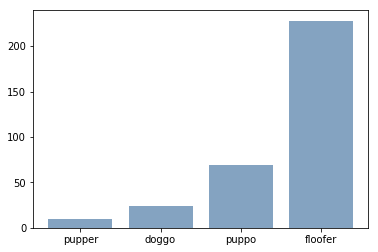

In [57]:
height = [10,24,69,228]
bar= ['pupper','doggo','puppo' ,'floofer']
y_pos = np.arange(len(bar))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, bar)
plt.show()

- Floofer stage had appeared the most in this dataset